In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from numpy import linalg as la
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import statistics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
wells = pd.read_csv("wells1.csv")
wells

,GR,log10(LLD),log10(MSFL),DT,RHOB,NPHI,PEF
0,7.44,2.0790,1.8232,59.31,2.60,0.06,8.59
1,5.21,2.1180,1.9281,57.63,2.59,0.07,8.00
2,5.59,2.1902,1.7045,60.25,2.57,0.07,8.66
3,5.98,2.1210,2.0332,61.69,2.54,0.07,8.67
4,7.86,2.0646,1.6133,63.19,2.50,0.10,8.48
5,7.82,2.0646,1.4921,62.00,2.52,0.11,9.70
6,7.75,2.1020,1.6712,61.75,2.53,0.10,7.48
7,7.72,2.1478,1.6262,60.31,2.53,0.09,7.82
8,8.13,2.1537,1.7102,60.31,2.53,0.09,8.13
9,8.60,2.2119,1.8605,60.06,2.55,0.09,8.36


In [3]:
#Gettings column-wise data from the original dataframe
gr1 = wells.iloc[:,0]
lld1 = wells.iloc[:,1]
msfl1 =wells.iloc[:,2]
dt1 = wells.iloc[:,3]
rhob1 = wells.iloc[:,4]
nphi1 = wells.iloc[:,5]
pef1 = wells.iloc[:,6]



In [4]:
#STANDARDIZING THE DATA BY SUBTRACTING MEAN AND DIVIDING BY THE STANDARD DEVIATION
gr = (gr1[:] - gr1.mean())/(gr1.std())
lld = (lld1[:] - lld1.mean())/(lld1.std())
msfl = (msfl1[:] -  msfl1.mean())/(msfl1.std())
dt = (dt1[:] -  dt1.mean())/(dt1.std())
rhob = (rhob1[:] -  rhob1.mean())/(rhob1.std())
nphi = (nphi1[:] -  nphi1.mean())/(nphi1.std())
pef = (pef1[:] -  pef1.mean())/(pef1.std())

#Creating dataframe from the standardized samples of the variables
standard_wells = pd.DataFrame([gr, lld, msfl, dt, rhob, nphi, pef]).T
#Creating 2D array of the same for convenience
standard_wells1 = np.transpose(np.array([gr,lld,msfl,dt,rhob,nphi,pef]))


,GR,LLD,MSFL,DT,RHOB,NPHI,PEF
GR,0.998894,-0.001868,0.126485,-0.239638,0.196677,-0.234005,-0.261584
LLD,-0.001868,0.998894,0.645918,-0.559122,0.528910,-0.546711,0.294226
MSFL,0.126485,0.645918,0.998894,-0.627598,0.588170,-0.644728,0.198396
DT,-0.239638,-0.559122,-0.627598,0.998894,-0.856840,0.870426,-0.012682
RHOB,0.196677,0.528910,0.588170,-0.856840,0.998894,-0.885382,0.086961
NPHI,-0.234005,-0.546711,-0.644728,0.870426,-0.885382,0.998894,-0.106086
PEF,-0.261584,0.294226,0.198396,-0.012682,0.086961,-0.106086,0.998894


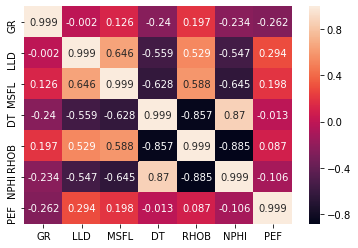

In [5]:
#Number of samples and variables
r, c = standard_wells.shape

#Generating Covariance Matrix
n_samples = standard_wells.shape[0]
cov_matrix= (np.dot(standard_wells.T, standard_wells))/(r)
cov_matrix =pd.DataFrame(cov_matrix)
cov_matrix.columns = ['GR', 'LLD' , 'MSFL', 'DT', 'RHOB', 'NPHI', 'PEF']
cov_matrix.index = ['GR', 'LLD' , 'MSFL', 'DT', 'RHOB', 'NPHI', 'PEF']
sn.heatmap(cov_matrix.round(3), fmt = "g", annot = True)
cov_matrix

cov_matrix

In [6]:
#Singular Value Decomposition of Covariance Matrix
u, s, v = np.linalg.svd(cov_matrix, full_matrices = True)
u.shape, s.shape, v.shape
sigma = np.diag(s)
pd.DataFrame(u),pd.DataFrame(s),pd.DataFrame(v)

(          0         1         2         3         4         5         6
 0 -0.122423  0.627923 -0.761248 -0.027321  0.095762 -0.015305  0.032798
 1 -0.379437 -0.293118 -0.119324  0.567285  0.653517 -0.071595 -0.043005
 2 -0.412304 -0.126809 -0.144395  0.483430 -0.741726 -0.045729  0.084388
 3  0.469509 -0.140179 -0.198121  0.160626 -0.067631 -0.804781 -0.206427
 4 -0.464308  0.089360  0.205432 -0.339593  0.078595 -0.553400  0.553605
 5  0.475925 -0.089256 -0.124348  0.282771  0.039563  0.171887  0.799372
 6 -0.092305 -0.684187 -0.537119 -0.471862 -0.035657  0.095287  0.043201,
           0
 0  3.796536
 1  1.373994
 2  0.684357
 3  0.557237
 4  0.337839
 5  0.135331
 6  0.106962,
           0         1         2         3         4         5         6
 0 -0.122423 -0.379437 -0.412304  0.469509 -0.464308  0.475925 -0.092305
 1  0.627923 -0.293118 -0.126809 -0.140179  0.089360 -0.089256 -0.684187
 2 -0.761248 -0.119324 -0.144395 -0.198121  0.205432 -0.124348 -0.537119
 3 -0.027321  0.56

In [7]:
#Principal Components from v matrix
v_1= pd.DataFrame(v, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index = ['GR', 'LOG10LLD', 'LOG(10)MSFL', 'DT','RHOB','NPHI','PEF'])
v_1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
GR,-0.122423,-0.379437,-0.412304,0.469509,-0.464308,0.475925,-0.092305
LOG10LLD,0.627923,-0.293118,-0.126809,-0.140179,0.089360,-0.089256,-0.684187
LOG(10)MSFL,-0.761248,-0.119324,-0.144395,-0.198121,0.205432,-0.124348,-0.537119
DT,-0.027321,0.567285,0.483430,0.160626,-0.339593,0.282771,-0.471862
RHOB,0.095762,0.653517,-0.741726,-0.067631,0.078595,0.039563,-0.035657
NPHI,-0.015305,-0.071595,-0.045729,-0.804781,-0.553400,0.171887,0.095287
PEF,0.032798,-0.043005,0.084388,-0.206427,0.553605,0.799372,0.043201


In [8]:
#Using PCA function to verify principal components
pca = PCA(svd_solver = "full")
pca.fit_transform(standard_wells)


array([[ 0.28922851,  1.85749105, -0.18578073, ..., -0.01167385,
        -0.47323268, -0.2233618 ],
       [ 0.21271522,  1.81295688, -0.45769019, ..., -0.09470762,
        -0.12275347, -0.05006508],
       [ 0.67918289,  2.11122387, -0.14119527, ...,  0.3026903 ,
        -0.38118977, -0.33849187],
       ...,
       [ 0.45259447, -0.99958905, -0.23074305, ..., -0.21151754,
         0.12608072,  0.29811121],
       [ 0.24748265, -1.13698194, -0.43957453, ...,  0.0124969 ,
         0.03815917,  0.26315656],
       [-0.43032887, -0.74028032, -0.370554  , ..., -0.66810949,
        -0.01772821,  0.26279663]])

In [9]:
#Principal Component Matrix from PCA function
PC = pd.DataFrame(pca.components_, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index = ['GR', 'LOG10LLD', 'LOG(10)MSFL', 'DT','RHOB','NPHI','PEF'])
PC

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
GR,-0.122423,-0.379437,-0.412304,0.469509,-0.464308,0.475925,-0.092305
LOG10LLD,-0.627923,0.293118,0.126809,0.140179,-0.089360,0.089256,0.684187
LOG(10)MSFL,0.761248,0.119324,0.144395,0.198121,-0.205432,0.124348,0.537119
DT,0.027321,-0.567285,-0.483430,-0.160626,0.339593,-0.282771,0.471862
RHOB,0.095762,0.653517,-0.741726,-0.067631,0.078595,0.039563,-0.035657
NPHI,-0.015305,-0.071595,-0.045729,-0.804781,-0.553400,0.171887,0.095287
PEF,0.032798,-0.043005,0.084388,-0.206427,0.553605,0.799372,0.043201


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Fraction of contribution,0.542963,0.196502,0.097874,0.079694,0.048316,0.019354,0.015297


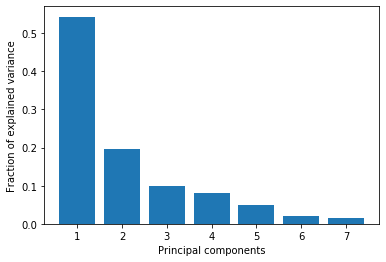

In [11]:
#Bar Chart of fraction of explained variance by different components
per_var = np.round(pca.explained_variance_ratio_, decimals = 4)
plt.bar(x = range(1, len(per_var)+1), height = per_var  )
plt.xlabel('Principal components')
plt.ylabel('Fraction of explained variance')

fraction = (pca.explained_variance_ratio_)
fraction = pd.DataFrame(fraction).T
fraction.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
fraction.index = ['Fraction of contribution']
fraction

Text(0, 0.5, 'cumulative explained variance')

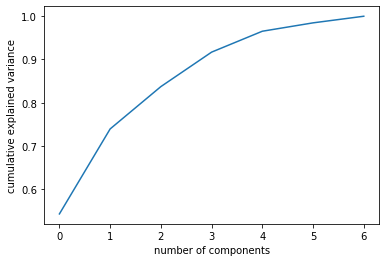

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


In [13]:
v

array([[-0.12242301, -0.37943676, -0.41230447,  0.46950854, -0.46430803,
         0.47592539, -0.09230484],
       [ 0.62792335, -0.29311789, -0.12680905, -0.14017924,  0.08936015,
        -0.08925587, -0.68418679],
       [-0.76124775, -0.11932444, -0.14439471, -0.19812076,  0.20543205,
        -0.12434822, -0.53711923],
       [-0.02732127,  0.56728451,  0.48342999,  0.16062647, -0.33959289,
         0.28277087, -0.47186197],
       [ 0.09576185,  0.65351689, -0.74172612, -0.06763054,  0.07859498,
         0.03956257, -0.03565743],
       [-0.01530463, -0.07159533, -0.04572902, -0.80478119, -0.55339959,
         0.17188712,  0.09528743],
       [ 0.03279824, -0.04300463,  0.08438795, -0.20642714,  0.55360535,
         0.79937237,  0.04320083]])

In [14]:
#Slicing columns PC5 and PC6, for taking 5 components
v[:,5] = 0
v[:,6] = 0
v

array([[-0.12242301, -0.37943676, -0.41230447,  0.46950854, -0.46430803,
         0.        ,  0.        ],
       [ 0.62792335, -0.29311789, -0.12680905, -0.14017924,  0.08936015,
         0.        ,  0.        ],
       [-0.76124775, -0.11932444, -0.14439471, -0.19812076,  0.20543205,
         0.        ,  0.        ],
       [-0.02732127,  0.56728451,  0.48342999,  0.16062647, -0.33959289,
         0.        ,  0.        ],
       [ 0.09576185,  0.65351689, -0.74172612, -0.06763054,  0.07859498,
         0.        ,  0.        ],
       [-0.01530463, -0.07159533, -0.04572902, -0.80478119, -0.55339959,
         0.        ,  0.        ],
       [ 0.03279824, -0.04300463,  0.08438795, -0.20642714,  0.55360535,
         0.        ,  0.        ]])

In [15]:
#Defining various columns of principal components
v1 = v[0,:]
v2 = v[1,:]
v3 = v[2,:]
v4 = v[3,:]
v5 = v[4,:]
v6 = v[5,:]
v7 = v[6,:]


In [16]:
#Generating new data by projected initial standardized data onto Principal Components
pc1 = []
pc2 = []
pc3 = []
pc4 = []
pc5 = []
pc6 = []
pc7 = []
i = 0
for i in range(0, 904) :
    sum1 = np.sum(v1* standard_wells1[i,:])
    sum2 = np.sum(v2* standard_wells1[i,:])
    sum3 = np.sum(v3 * standard_wells1[i, :])
    sum4 = np.sum(v4 * standard_wells1[i,:])
    sum5 = np.sum(v5 * standard_wells1[i,:])
    pc1.append(sum1)
    pc2.append(sum2)
    pc3.append(sum3)
    pc4.append(sum4)
    pc5.append(sum5)
    i = i + 1
    

gr = (gr1[:] - gr1.mean())/(gr1.std())
lld = (lld1[:] - lld1.mean())/(lld1.std())
msfl = (msfl1[:] -  msfl1.mean())/(msfl1.std())
dt = (dt1[:] -  dt1.mean())/(dt1.std())
rhob = (rhob1[:] -  rhob1.mean())/(rhob1.std())
nphi = (nphi1[:] -  nphi1.mean())/(nphi1.std())
pef = (pef1[:] -  pef1.mean())/(pef1.std())

pc = [pc1, pc2, pc3, pc4, pc5, gr, lld, msfl, dt, rhob]
pc = pd.DataFrame(pc).T
pc.columns =  ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'gr', 'lld', 'msfl' ,'dt' ,'rhob']
pc

,PC1,PC2,PC3,PC4,PC5,gr,lld,msfl,dt,rhob
0,0.454217,-0.986466,0.864296,0.219452,0.038023,-1.333065,0.213118,-0.099590,0.720493,0.016056
1,0.245224,-1.122573,1.006419,0.373167,-0.064221,-1.520043,0.310991,0.118649,0.369195,-0.113537
2,0.741938,-1.196645,0.865927,0.426216,0.344861,-1.488181,0.492183,-0.346539,0.917053,-0.372723
3,0.843765,-1.288877,0.623489,0.837790,-0.323644,-1.455481,0.318520,0.337304,1.218166,-0.761502
4,1.626304,-1.127921,0.477888,0.557293,0.184955,-1.297849,0.176980,-0.536276,1.531825,-1.279874
5,1.493504,-1.040009,0.619395,0.307500,0.408860,-1.301203,0.176980,-0.788427,1.282989,-1.020688
6,1.220266,-1.099548,0.595841,0.488629,0.206984,-1.307072,0.270838,-0.415818,1.230712,-0.891095
7,1.074187,-1.080736,0.657216,0.460275,0.371662,-1.309587,0.385777,-0.509439,0.929600,-0.891095
8,0.992307,-1.085651,0.604045,0.552218,0.255008,-1.275210,0.400583,-0.334681,0.929600,-0.891095
9,0.658253,-1.112881,0.575069,0.688747,0.146208,-1.235802,0.546640,-0.021990,0.877323,-0.631909


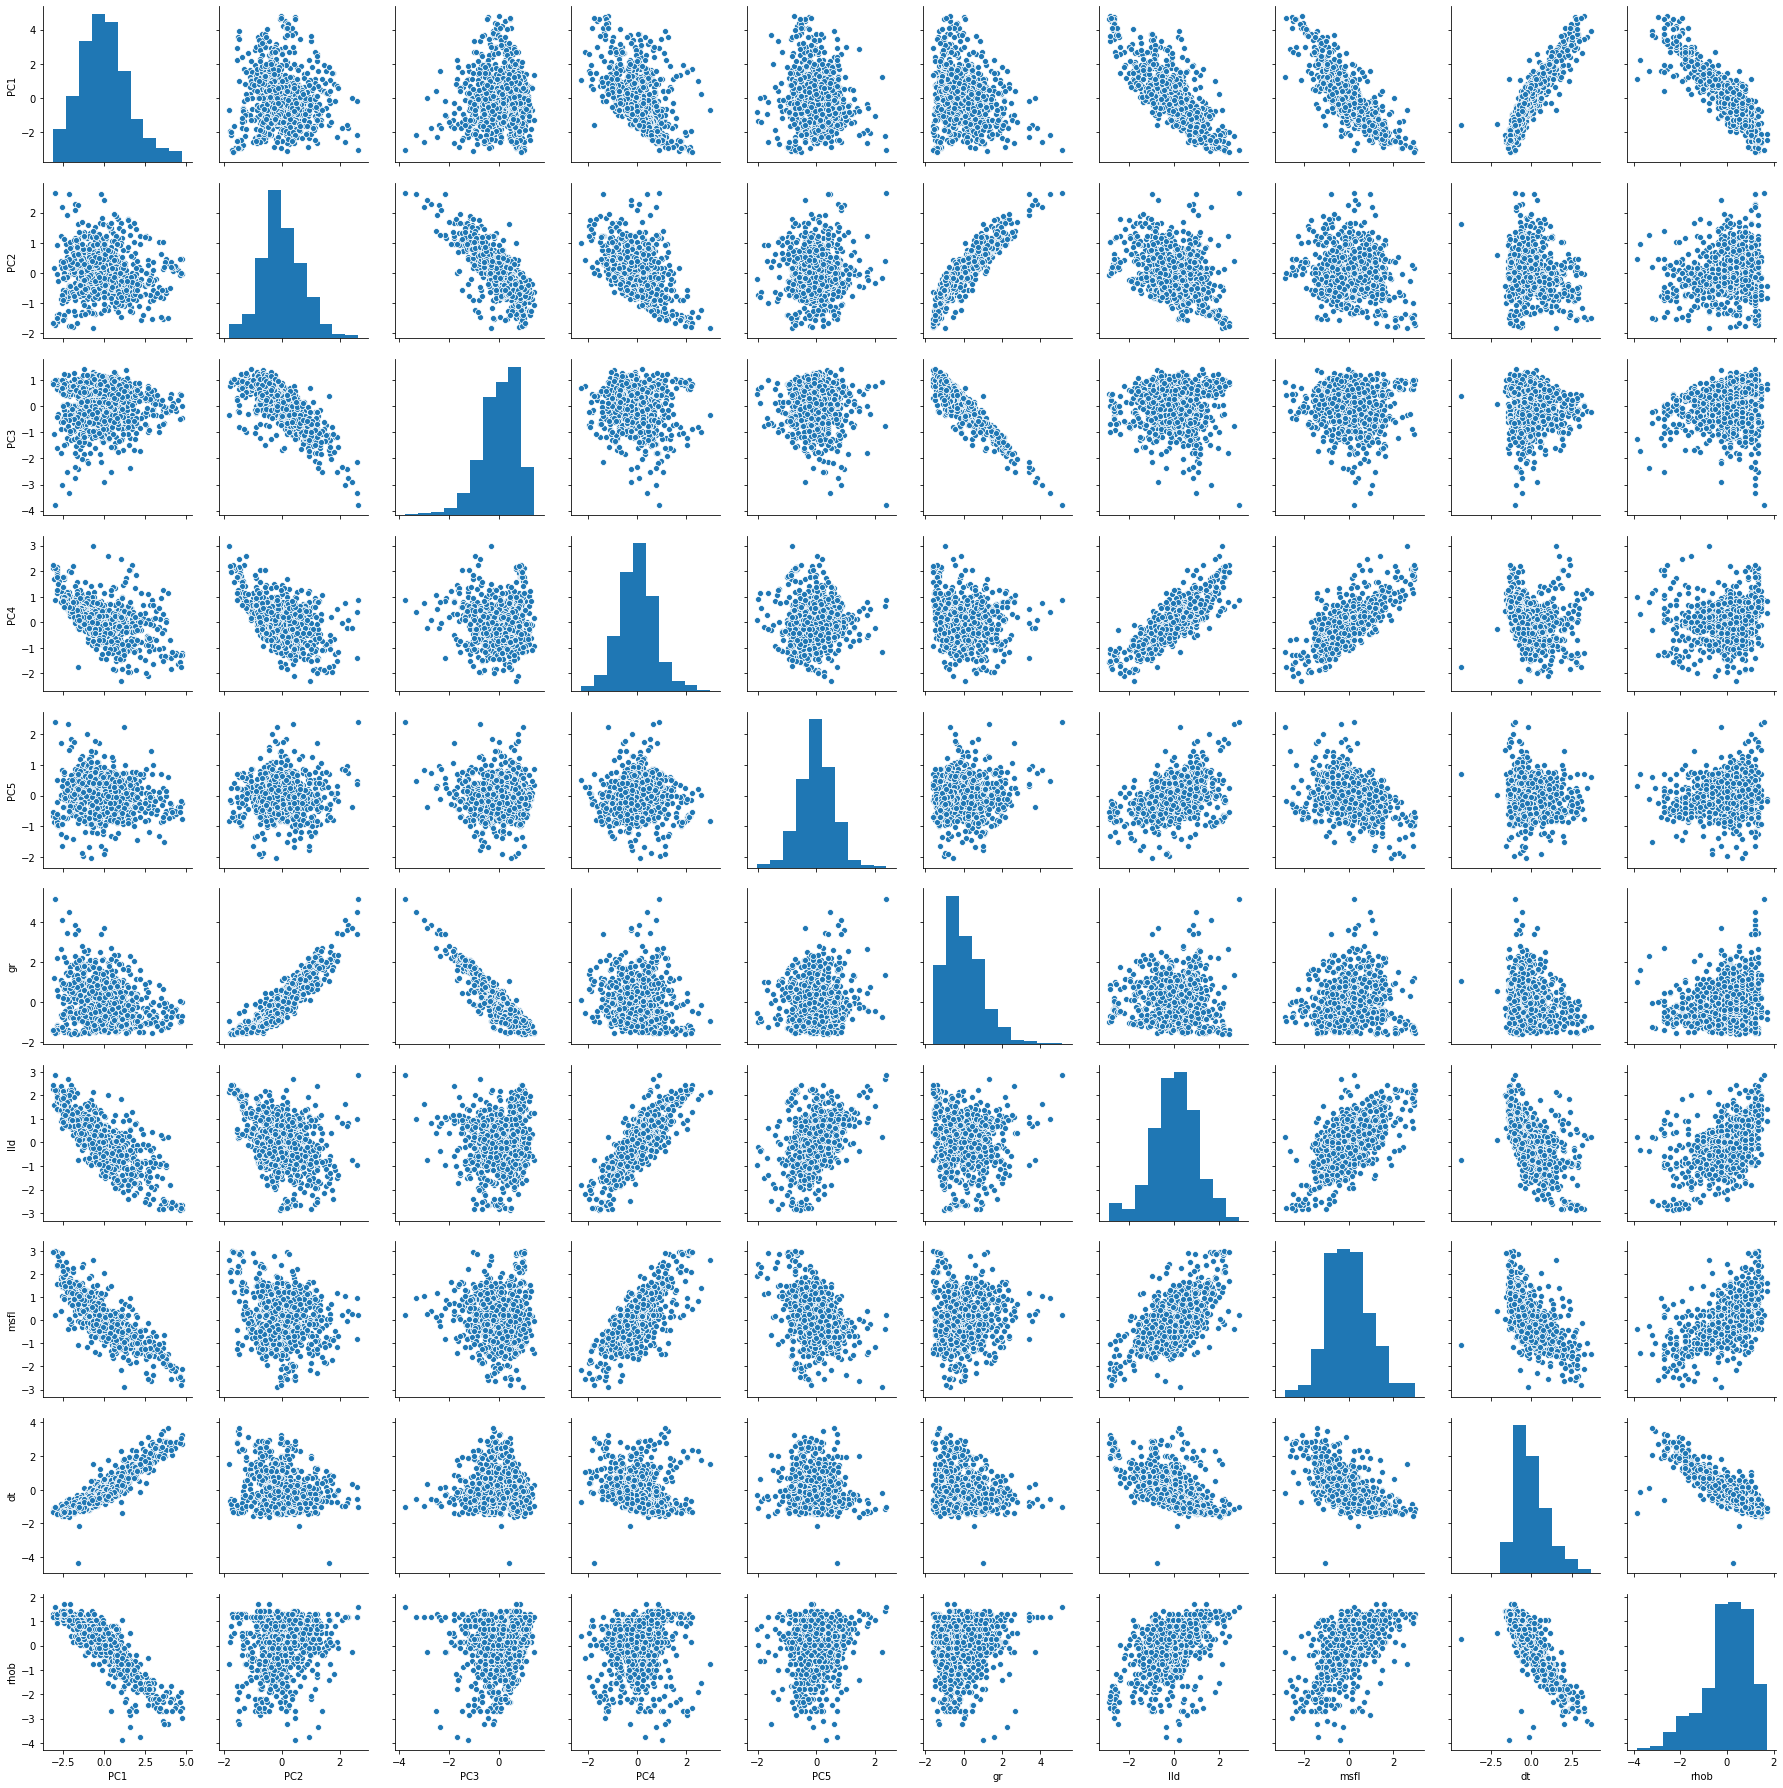

In [17]:

sn.pairplot(pc)

Text(0, 0.5, 'PC2')

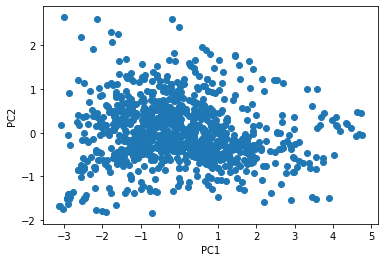

In [18]:
plt.scatter(pc1,pc2)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [39]:
#Sum of Squared Errors plot
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}
sse = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(standard_wells)
    sse.append(kmeans.inertia_)
print('Initialization State: Random')
print('Number of initialization : 10')
print('Max  number of iterations  300')


Initialization State: Random
Number of initialization : 10
Max  number of iterations  300


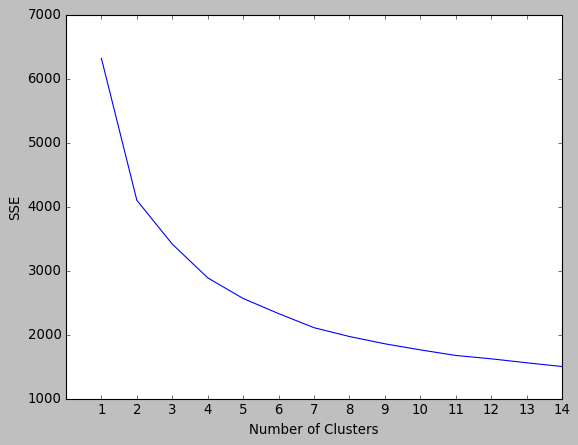

In [40]:
plt.style.use("classic")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [37]:
pc = [pc1, pc2, pc3, pc4, pc5]
pc = np.transpose(pc)


In [54]:
kmeans = KMeans(init = "random", n_clusters = 4, n_init=10, max_iter=300)
kmeans.fit(standard_wells1)
centers = kmeans.cluster_centers_

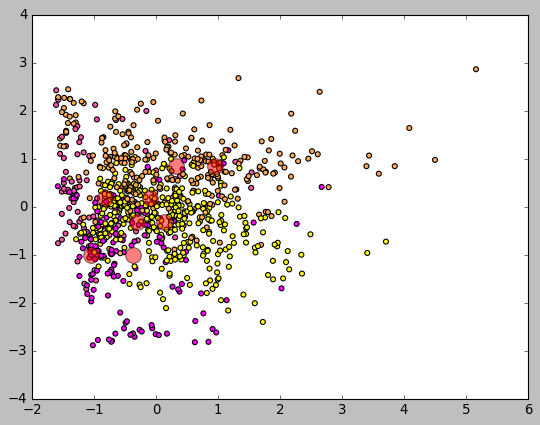

In [70]:
#PLotting Clusters
y = kmeans.predict(standard_wells)
plt.scatter(standard_wells1[:,0], standard_wells1[:, 1], c = y, s=20, cmap ='spring')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha = 0.5)
plt.scatter(centers[:,2], centers[:,1], c='red', s=200, alpha = 0.5)
plt.show()

In [56]:
centers = kmeans.cluster_centers_

In [57]:
print('Centroid positions:', centers)

Centroid positions: [[-0.37704521 -1.01959184 -1.04911715  1.66185004 -1.74190101  1.76823048
  -0.41612453]
 [-0.82702074  0.17725226 -0.09136386  0.26745606 -0.15592742  0.04143209
   2.08014955]
 [ 0.31683389  0.84764964  0.95458701 -0.89875421  0.86799263 -0.86414496
   0.02325241]
 [ 0.13478036 -0.3173195  -0.31079629 -0.00721843  0.02815111 -0.00808499
  -0.458012  ]]
